In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv("data 2.csv")
df.head()

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [8]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   batting_team    76014 non-null  object 
 4   bowling_team    76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [10]:
df.dtypes

mid                 int64
date               object
venue              object
batting_team       object
bowling_team       object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

# Data Cleaning

In [11]:
df.columns

Index(['mid', 'date', 'venue', 'batting_team', 'bowling_team', 'batsman',
       'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'non-striker', 'total'],
      dtype='object')

In [12]:
##remove unwanted columns
irrelevent=['mid','date','venue','batsman','bowler','striker','non-striker']
print(f"before removing{df.shape}")
df.drop(irrelevent,axis=1,inplace=True)
print(f"after removing{df.shape}")
df.head()

before removing(76014, 15)
after removing(76014, 8)


,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [9]:
df.batting_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [13]:
consistent=['Kolkata Knight Riders','Chennai Super Kings','Rajasthan Royals','Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore','Delhi Daredevils','Sunrisers Hyderabad']
print(f"before removing {df.shape}")
df=df[(df['batting_team'].isin(consistent))&(df['bowling_team'].isin(consistent))]
print(f'after removing {df.shape}')
      

before removing (76014, 8)
after removing (53811, 8)


In [14]:
print(f'consistent teams \n {df.batting_team.unique()}')
df.head()

consistent teams 
 ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [15]:
print(f'before removing {df.shape}')
df=df[df['overs']>=5.0]
print(f'after removing {df.shape}')

before removing (53811, 8)
after removing (40108, 8)


In [16]:
df.head()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [17]:
correlation=df.iloc[:,2:].corr()
print(correlation)

                    runs   wickets     overs  runs_last_5  wickets_last_5  \
runs            1.000000  0.359222  0.879575     0.584435        0.115359   
wickets         0.359222  1.000000  0.635803    -0.203286        0.633125   
overs           0.879575  0.635803  1.000000     0.286564        0.221914   
runs_last_5     0.584435 -0.203286  0.286564     1.000000       -0.276398   
wickets_last_5  0.115359  0.633125  0.221914    -0.276398        1.000000   
total           0.391254 -0.457055  0.028468     0.587091       -0.297397   

                   total  
runs            0.391254  
wickets        -0.457055  
overs           0.028468  
runs_last_5     0.587091  
wickets_last_5 -0.297397  
total           1.000000  


<Axes: >

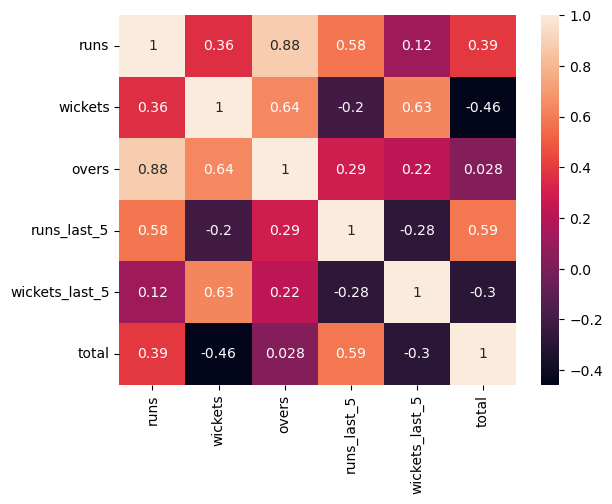

In [18]:
import seaborn as sns
sns.heatmap(correlation,annot=True)

# Data preprocessing and Encoding

In [19]:
df.columns

Index(['batting_team', 'bowling_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [20]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
for col in ['batting_team','bowling_team']:
    df[col]=le.fit_transform(df[col])
df.head()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222


In [21]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0, 1])],
    remainder='passthrough'
)

In [22]:
df = np.array(columnTransformer.fit_transform(df))

In [23]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df1=pd.DataFrame(df,columns=cols)

In [24]:
df1.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,0.0,5.1,59.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.2,59.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.3,59.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.4,59.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.5,58.0,1.0,222.0


# Model Building

In [25]:
x=df1.drop('total',axis=1)
y=df1['total']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)
print(f'x_train shpe{x_train.shape}')
print(f'x_test shpe{x_test.shape}')

x_train shpe(32086, 21)
x_test shpe(8022, 21)


# Model Algorithms

In [27]:
model=dict()

# Decision Tree algorithm

In [28]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [29]:
##evaluate the model
train_score=str((tree.score(x_train,y_train))*100)
test_score=str((tree.score(x_test,y_test))*100)
print(f'train_score:{train_score[:5]}%\ntest_score:{test_score[:5]}%')
model['tree']=test_score

train_score:99.98%
test_score:86.80%


In [30]:
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse
print('------Decision Tree Model evaluation------')
print(f'MAE {mae(y_test,tree.predict(x_test))}')
print(f'MSE {mse(y_test,tree.predict(x_test))}')
print(f'RMSE {np.sqrt(mse(y_test,tree.predict(x_test)))}')

------Decision Tree Model evaluation------
MAE 3.9396035901271502
MSE 119.53873722263775
RMSE 10.933377210296815


# Linear Regression

In [31]:
##fit the model
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)
##evaluate the model
train_score=str((linreg.score(x_train,y_train))*100)
test_score=str((linreg.score(x_test,y_test))*100)
print(f'train_score:{train_score[:5]}%\ntest_score:{test_score[:5]}%')
model['linreg']=test_score
print('------Linear Regression Model evaluation------')
print(f'MAE {mae(y_test,linreg.predict(x_test))}')
print(f'MSE {mse(y_test,linreg.predict(x_test))}')
print(f'RMSE {np.sqrt(mse(y_test,linreg.predict(x_test)))}')

train_score:66.04%
test_score:65.43%
------Linear Regression Model evaluation------
MAE 13.188954848874776
MSE 313.2332710871963
RMSE 17.698397415788705


# Random Forest Regression

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
import numpy as np
import joblib
import bz2

# Train the model
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

# Evaluate the model
train_score = forest.score(x_train, y_train) * 100
test_score = forest.score(x_test, y_test) * 100
print(f'train_score: {train_score:.2f}%')
print(f'test_score: {test_score:.2f}%')
print('------ Random Forest Regression Model Evaluation ------')
print(f'MAE: {mae(y_test, forest.predict(x_test))}')
print(f'MSE: {mse(y_test, forest.predict(x_test))}')
print(f'RMSE: {np.sqrt(mse(y_test, forest.predict(x_test)))}')


train_score: 99.04%
test_score: 93.46%
------ Random Forest Regression Model Evaluation ------
MAE: 4.474703256520758
MSE: 59.26232183241183
RMSE: 7.698202506586315


In [57]:
# Save the model
with bz2.BZ2File('forest_model.pbz2', 'wb') as f:
    joblib.dump(forest, f)

In [51]:
# Save the model
joblib.dump(forest, 'forest_model.pbz2')

['forest_model.pbz2']

# Lasso Regression

In [30]:
##fit the model
from sklearn.linear_model import LassoCV
lasso=LassoCV()
lasso.fit(x_train,y_train)
##evaluate the model
train_score=str((lasso.score(x_train,y_train))*100)
test_score=str((lasso.score(x_test,y_test))*100)
print(f'train_score:{train_score[:5]}%\ntest_score:{test_score[:5]}%')
model['lasso']=test_score
print('------lasso Regression Model evaluation------')
print(f'MAE {mae(y_test,lasso.predict(x_test))}')
print(f'MSE {mse(y_test,lasso.predict(x_test))}')
print(f'RMSE {np.sqrt(mse(y_test,lasso.predict(x_test)))}')

train_score:65.08%
test_score:64.47%
------lasso Regression Model evaluation------
MAE 13.085804661490284
MSE 310.25711772068314
RMSE 17.61411700087981


# SVM

In [36]:
##fit the model
from sklearn.svm import SVR
svm=SVR()
svm.fit(x_train,y_train)
##evaluate the model
train_score=str((svm.score(x_train,y_train))*100)
test_score=str((svm.score(x_test,y_test))*100)
print(f'train_score:{train_score[:5]}%\ntest_score:{test_score[:5]}%')
model['svm']=test_score
print('------SVM Model evaluation------')
print(f'MAE {mae(y_test,svm.predict(x_test))}')
print(f'MSE {mse(y_test,svm.predict(x_test))}')
print(f'RMSE {np.sqrt(mse(y_test,svm.predict(x_test)))}')


train_score:57.45%
test_score:57.01%
------SVM Model evaluation------
MAE 14.615074757711932
MSE 375.399861859665
RMSE 19.37523836910568


# Neural Network

In [37]:
from sklearn.neural_network import MLPRegressor
neural_network=MLPRegressor(activation='logistic',max_iter=500)
neural_network.fit(x_train,y_train)
##evaluate the model
train_score=str((neural_network.score(x_train,y_train))*100)
test_score=str((neural_network.score(x_test,y_test))*100)
print(f'train_score:{train_score[:5]}%\ntest_score:{test_score[:5]}%')
model['neural_network']=test_score
print('------neural_network Model evaluation------')
print(f'MAE {mae(y_test,neural_network.predict(x_test))}')
print(f'MSE {mse(y_test,neural_network.predict(x_test))}')
print(f'RMSE {np.sqrt(mse(y_test,neural_network.predict(x_test)))}')

train_score:86.42%
test_score:84.17%
------neural_network Model evaluation------
MAE 8.362401464668187
MSE 138.2253162166999
RMSE 11.756926308210828


C:\Users\arunk\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Best MOdel Selection

In [38]:
model

{'tree': '84.39685896209741',
 'linreg': '65.16559612323242',
 'forest': '93.11466442173175',
 'lasso': '64.47467360603586',
 'svm': '57.01564328712709',
 'neural_network': '84.1728063788436'}

<Axes: >

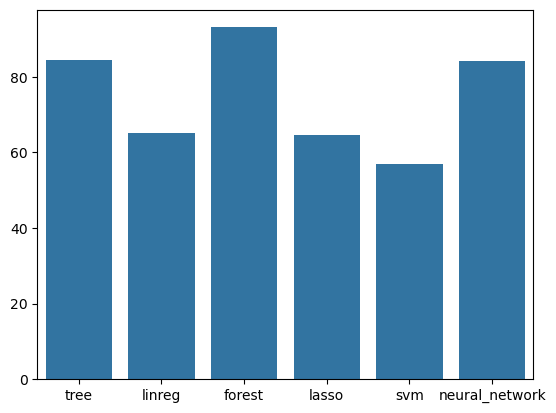

In [39]:
models=list(model.keys())
accuracy=list(map(float,model.values()))
sns.barplot(x=models,y=accuracy)

# Prediction

In [41]:
def predict_score(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

In [42]:
batting_team='Delhi Daredevils'
bowling_team='Chennai Super Kings'
score = predict_score(batting_team, bowling_team, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 147')

Predicted Score : 143 || Actual Score : 147


C:\Users\arunk\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [43]:
batting_team='Chennai Super Kings'
bowling_team='Rajasthan Royals'
score = predict_score(batting_team, bowling_team, overs=10, runs=100, wickets=2, runs_last_5=50, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : ')

Predicted Score : 166 || Actual Score : 


C:\Users\arunk\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [44]:
import pickle
pickle.dump(forest, open("forest_model.pkl",'wb'))

In [58]:
import numpy as np
import joblib
import bz2

def predict_score(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model):
    prediction_array = []
    # Batting Team
    teams = ['Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab', 'Kolkata Knight Riders',
             'Mumbai Indians', 'Rajasthan Royals', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']
    for team in teams:
        if batting_team == team:
            prediction_array.append(1)
        else:
            prediction_array.append(0)
    
    # Bowling Team
    for team in teams:
        if bowling_team == team:
            prediction_array.append(1)
        else:
            prediction_array.append(0)
    
    prediction_array += [runs, wickets, overs, runs_last_5, wickets_last_5]
    prediction_array = np.array([prediction_array])
    
    pred = model.predict(prediction_array)
    return int(round(pred[0]))

def main():
    # Load the trained model
    try:
        with bz2.BZ2File('forest_model.pbz2', 'rb') as f:
            model = joblib.load(f)
            if not hasattr(model, 'predict'):
                raise TypeError("The loaded object is not a valid model. It does not have a 'predict' method.")
    except FileNotFoundError:
        print("Model file not found. Please ensure 'forest_model.pbz2' exists.")
        return
    except Exception as e:
        print(f"Error loading model: {str(e)}")
        return

    # Take user input
    batting_team = input("Enter the batting team: ")
    bowling_team = input("Enter the bowling team: ")
    runs = int(input("Enter the current runs: "))
    wickets = int(input("Enter the current wickets: "))
    overs = float(input("Enter the current overs: "))
    runs_last_5 = int(input("Enter the runs scored in the last 5 overs: "))
    wickets_last_5 = int(input("Enter the wickets lost in the last 5 overs: "))

    # Make prediction
    try:
        predicted_score = predict_score(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model)
        print(f"Predicted score: {predicted_score}")
    except Exception as e:
        print(f"Error making prediction: {str(e)}")

if __name__ == "__main__":
    main()


Enter the batting team:  Delhi Daredevils
Enter the bowling team:  Rajasthan Royals
Enter the current runs:  120
Enter the current wickets:  3
Enter the current overs:  11
Enter the runs scored in the last 5 overs:  45
Enter the wickets lost in the last 5 overs:  1


Predicted score: 209


C:\Users\arunk\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [2]:
import numpy as np

# Print the numpy version
np.__version__


'1.26.4'

In [35]:
import joblib

# Print joblib version
joblib.__version__


'1.2.0'

In [37]:
pip install bz2file

Note: you may need to restart the kernel to use updated packages.


In [39]:
import bz2file

print("bz2file version:", bz2file.__version__)


In [45]:
import bz2file as bz2
import pickle  # or any other library you used to save the model

# Load your model file (replace 'forest_model.joblib' with the actual path to your model file)
with open('forest_model.pbz2', 'rb') as f:
    model = pickle.load(f)  # or joblib.load(f) if you used joblib to save the model

# Define a function to compress and save the model
def compressed_pickle(title, data):
    with bz2.BZ2File(title + '.pbz2', 'w') as f:
        pickle.dump(data, f)  # or joblib.dump(data, f) if you used joblib to save the model

# Call the function to compress and save the model
compressed_pickle('compressed_forest_model', model)


In [44]:
# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [53]:
import joblib
import bz2

# Assuming `model` is your trained model
with bz2.BZ2File('forest_model.pbz2', 'wb') as f:
    joblib.dump(model, f)


In [ ]:
import joblib
import bz2

# Assuming 'model' is your trained scikit-learn model
with bz2.BZ2File('forest_model.pbz2', 'wb') as f:
    joblib.dump(model, f)
